In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import random
import zipfile
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

# improve visualization
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [ ]:
# connecting the colab to the Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_train = '/content/drive/MyDrive/UROP/chest_xray/train' 
dir_valid = '/content/drive/MyDrive/UROP/chest_xray/val'
dir_test = '/content/drive/MyDrive/UROP/chest_xray/test'

labels = ['NORMAL', 'PNEUMONIA'] # creating the labels
dataset_train = []
dataset_valid = []
dataset_test = []
 
def load_train_dataset(): # creating function to load dataset_train
  for label in labels:
    path = os.path.join(dir_train, label)
    class_num = labels.index(label)
    for imagem in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, imagem), cv2.IMREAD_GRAYSCALE)
        resize_img = cv2.resize(img_array, (150,150))
        dataset_train.append([resize_img, class_num])
      except Exception as e:
        pass

def load_valid_dataset(): # function to load dataset_valid
  for label in labels:
    path = os.path.join(dir_valid, label)
    class_num = labels.index(label)
    for imagem in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, imagem), cv2.IMREAD_GRAYSCALE)
        resize_img = cv2.resize(img_array, (150,150))
        dataset_valid.append([resize_img, class_num])
      except Exception as e:
        pass

def load_test_dataset(): # function to load dataset_test
  for label in labels:
    path = os.path.join(dir_test, label)
    class_num = labels.index(label)
    for imagem in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, imagem), cv2.IMREAD_GRAYSCALE)
        resize_img = cv2.resize(img_array, (150,150))
        dataset_test.append([resize_img, class_num])
      except Exception as e:
        pass

load_train_dataset()
load_valid_dataset()
load_test_dataset()

In [ ]:
x_train_ini = []
y_train = []

x_valid_ini = []
y_valid = []

x_test_ini = []
y_test = []

for features, label in dataset_train:
  x_train_ini.append(features)
  y_train.append(label)

for features, label in dataset_valid:
  x_valid_ini.append(features)
  y_valid.append(label)

for features, label in dataset_test:
  x_test_ini.append(features)
  y_test.append(label)

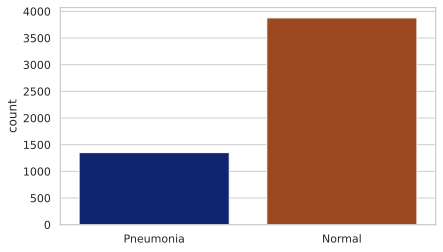

In [ ]:
graph_label = []

for i in dataset_train:
  if (i[1] == 1):
    graph_label.append('Normal')
  else:
    graph_label.append('Pneumonia')
sns.countplot(graph_label)
plt.show()

Text(0.5, 0, 'PNEUMONIA')

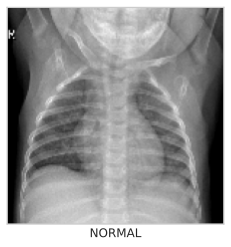

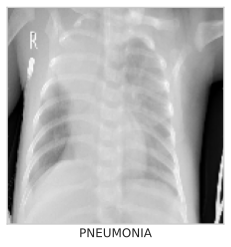

In [ ]:
# Healthy Lung
plt.figure(figsize=(4,4))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(dataset_train[0][0], cmap='gray')
plt.xlabel(labels[dataset_train[0][1]])

# lung with pneumonia
plt.figure(figsize=(4,4))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(dataset_train[-1][0], cmap='gray')
plt.xlabel(labels[dataset_train[-1][1]])

In [ ]:

# function to normalize the pixels
f_norm = lambda x: (np.array(x) / 255.0).astype('float32')

x_train = f_norm(x_train_ini)
x_valid = f_norm(x_valid_ini)
x_test = f_norm(x_test_ini) 

# shape:
print('Shape x_train: {} \nShape x_valid: {} \nShape x_test: {}'.format(
    x_train.shape, x_valid.shape, x_test.shape))

Shape x_train: (5229, 150, 150) 
Shape x_valid: (16, 150, 150) 
Shape x_test: (624, 150, 150)


In [ ]:
# resize function
f_resize = lambda x: np.array(x).reshape(-1, 150, 150, 1)

x_train = f_resize(x_train)
x_valid = f_resize(x_valid)
x_test = f_resize(x_test)

# let's print the shape again to check the changes
print('Shape x_train: {} \nShape x_valid: {} \nShape x_test: {}'.format(
    x_train.shape, x_valid.shape, x_test.shape))

Shape x_train: (5229, 150, 150, 1) 
Shape x_valid: (16, 150, 150, 1) 
Shape x_test: (624, 150, 150, 1)


In [ ]:

# function to convert to array
fc = lambda x: np.array(x)

x_train = fc(x_train)
y_train = fc(y_train)
x_valid = fc(x_valid)
y_valid = fc(y_valid)
x_test = fc(x_test)
y_test = fc(y_test)

In [ ]:
data_gen = ImageDataGenerator(
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [ ]:
data_gen.fit(x_test)

In [ ]:
model = keras.models.Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding='same', activation='relu', input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(64, (3,3), strides=1 ,padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation='sigmoid'))

In [ ]:

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(data_gen.flow(
x_train, y_train, batch_size=32, shuffle=True),epochs=10, validation_data = (x_valid, y_valid), callbacks=[learning_rate_reduction])

Epoch 1/10
164/164 [==============================] - 323s 2s/step - loss: 0.5238 - accuracy: 0.8329 - val_loss: 30.1077 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
164/164 [==============================] - 325s 2s/step - loss: 0.2852 - accuracy: 0.8902 - val_loss: 8.3798 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
164/164 [==============================] - ETA: 0s - loss: 0.2470 - accuracy: 0.9107
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
164/164 [==============================] - 332s 2s/step - loss: 0.2470 - accuracy: 0.9107 - val_loss: 28.7419 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10
164/164 [==============================] - 325s 2s/step - loss: 0.1631 - accuracy: 0.9409 - val_loss: 4.0159 - val_accuracy: 0.5625 - lr: 3.0000e-04
Epoch 5/10
164/164 [==============================] - 326s 2s/step - loss: 0.1537 - accuracy: 0.9451 - val_loss: 1.6820 - val_accuracy: 0.5625 - lr: 3.0000e-04
Epoch 6/10
164/164 [=============================

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 89.90%


In [ ]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Testing Score')
    plt.plot(epochs, val_accuracy, 'r', label='validation Score')
    plt.title('Scores')
    plt.legend()
    plt.show()

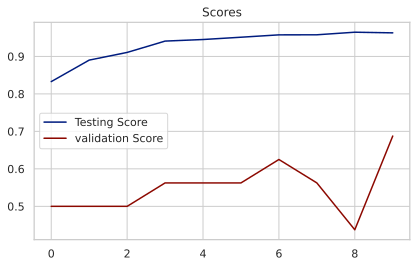

In [ ]:
plot_scores(history)

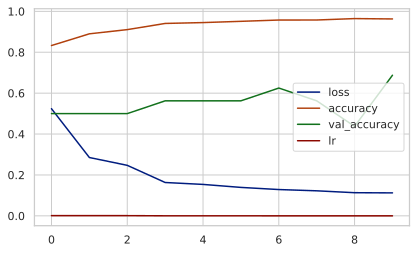

In [ ]:
# pd.DataFrame(history.history, columns=["loss", "accuracy", "val_accuracy", "lr"]).plot()
# plt.show()
pd.DataFrame(history.history, columns=["loss", "accuracy", "val_accuracy", "lr"]).plot()
plt.show()

In [ ]:
img = '/content/drive/MyDrive/UROP/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg'
img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
resize_img = cv2.resize(img_array, (150,150))

resize_img = np.array(resize_img) / 255.0
resize_img = f_resize(resize_img)

if(model.predict(resize_img)>=0.50):
  print("Lungs with Pneumonia")
else:
  print("Lungs without Pneumonia")

Lungs with Pneumonia


In [ ]:
img = '/content/drive/MyDrive/UROP/chest_xray/test/NORMAL/IM-0011-0001-0001.jpeg'
img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
resize_img = cv2.resize(img_array, (150,150))

resize_img = np.array(resize_img) / 255.0
resize_img = f_resize(resize_img)

if(model.predict(resize_img)>=0.50):
  print("Lungs with Pneumonia")
else:
  print("Lungs without Pneumonia")

Lungs without Pneumonia
